### Task 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score

In [2]:
inc=pd.read_csv('DS2_C5_S3_Income_Data_Challenge.csv')
inc
incsave=inc.copy()

In [3]:
inc.shape

(32561, 15)

In [4]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
inc.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Task 2

In [6]:
inc.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [7]:
cat=inc.select_dtypes(include='object')
catcol=cat.columns

In [8]:
for i in catcol:
    inc[i]=inc[i].astype('category')

In [9]:
label_encoder = preprocessing.LabelEncoder()
for i in catcol:
    inc[i]=label_encoder.fit_transform(inc[i])
inc

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [10]:
inc=pd.DataFrame(MinMaxScaler().fit_transform(inc),columns=inc.columns)
inc

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.021740,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.166404,0.466667,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.951220,0.0
32557,0.315068,0.500,0.096500,0.733333,0.533333,0.333333,0.500000,0.0,1.0,1.0,0.000000,0.0,0.397959,0.951220,1.0
32558,0.561644,0.500,0.094827,0.733333,0.533333,1.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.397959,0.951220,0.0
32559,0.068493,0.500,0.128499,0.733333,0.533333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.193878,0.951220,0.0


<AxesSubplot:>

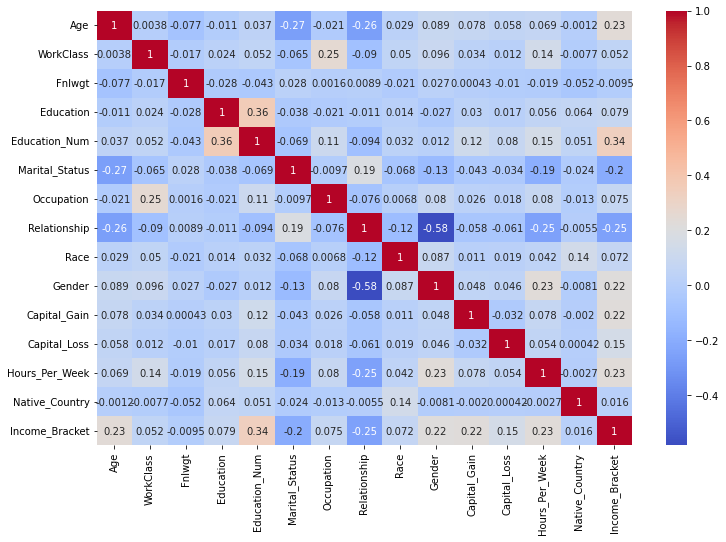

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(inc.corr(),annot=True,cmap='coolwarm')

In [12]:
xcol=['Age','WorkClass','Education','Education_Num','Marital_Status','Occupation','Relationship','Race','Gender','Capital_Gain','Capital_Loss','Hours_Per_Week','Native_Country']
x=inc[xcol]
y=inc['Income_Bracket']

In [13]:
x_train=x[:int(0.8*len(x))]
x_test=x[int(0.8*len(x)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [14]:
len(x_train)+len(x_test)

32561

<AxesSubplot:xlabel='Age'>

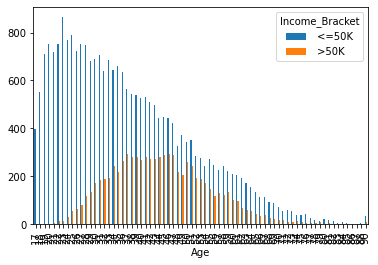

In [15]:
pd.crosstab(incsave['Age'],incsave['Income_Bracket']).plot(kind='bar')

<AxesSubplot:xlabel='Education'>

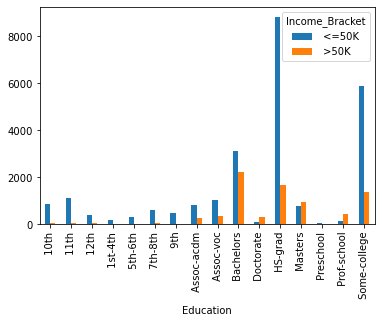

In [16]:
pd.crosstab(incsave['Education'],incsave['Income_Bracket']).plot(kind='bar')

<AxesSubplot:xlabel='Race'>

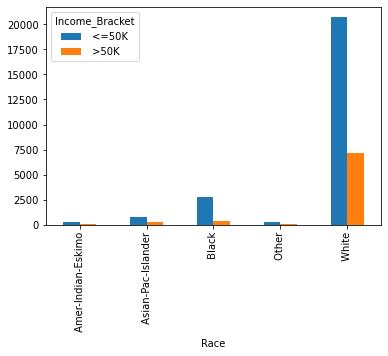

In [17]:
pd.crosstab(incsave['Race'],incsave['Income_Bracket']).plot(kind='bar')

<AxesSubplot:xlabel='Income_Bracket'>

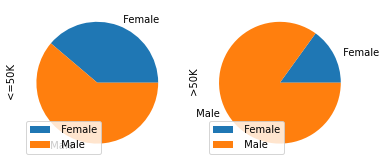

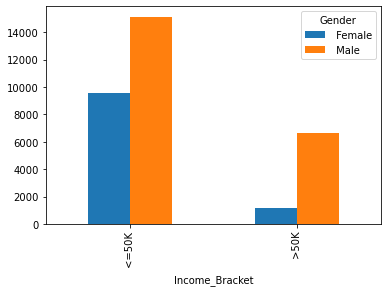

In [18]:
pd.crosstab(incsave['Gender'],incsave['Income_Bracket']).plot(kind='pie',subplots=True)
pd.crosstab(incsave['Income_Bracket'],incsave['Gender']).plot(kind='bar')

In [19]:
log_model=LogisticRegression()

In [20]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [22]:
test_prediction=log_model.predict(x_test)

In [23]:
np.unique(test_prediction,return_counts=True)

(array([0., 1.]), array([5541,  972], dtype=int64))

In [24]:
print('accuracy:', accuracy_score(y_test, test_prediction))
print('recall:', recall_score(y_test, test_prediction))
print('f1-score:', f1_score(y_test, test_prediction))
print('precision:', precision_score(y_test, test_prediction))

accuracy: 0.822815906648242
recall: 0.443125
f1-score: 0.5513219284603421
precision: 0.7294238683127572


In [25]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1])
roc

0.8622754045389782

In [26]:
y_hat=log_model.predict_proba(x_test)
pos_prob=y_hat[:,1]

In [27]:
roc=roc_auc_score(y_test,pos_prob)
print('ROC: %.3f' % roc)

ROC: 0.862


In [28]:
auc = roc_auc_score(y_test, y_hat[:,1])
print('AUC: %.3f' % auc)

AUC: 0.862


In [29]:
confusion_matrix(y_test,test_prediction,labels=[1,0])

array([[ 709,  891],
       [ 263, 4650]], dtype=int64)

In [30]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4913
         1.0       0.73      0.44      0.55      1600

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513



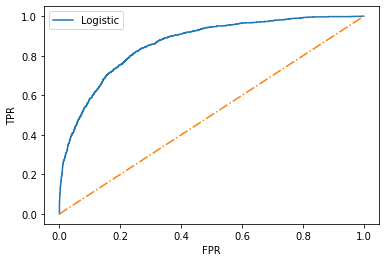

In [33]:
fpr,tpr,threshholds=roc_curve(y_test,pos_prob)
plt.plot(fpr,tpr,label='Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.plot([0,1],[0,1],linestyle='dashdot',label='No skill')
plt.show()

In [31]:
inccoef=log_model.coef_
inccoef

array([[ 2.41847296, -0.1017219 ,  0.13046985,  4.82140745, -1.33714543,
         0.1691861 , -0.58140978,  0.4504246 ,  0.87494722, 16.97816817,
         2.64645281,  2.76288185,  0.15040595]])

In [32]:
inccoefse=pd.Series(inccoef[0],index=x.columns).sort_values()
inccoefdf=pd.DataFrame(inccoefse,columns=['coef'])
inccoefdf

,coef
Marital_Status,-1.337145
Relationship,-0.581410
WorkClass,-0.101722
Education,0.130470
Native_Country,0.150406
Occupation,0.169186
Race,0.450425
Gender,0.874947
Age,2.418473
Capital_Loss,2.646453
